
The current notebook aims to explore the Earthquake dataset which has information about 782 quake events that have taken place around the world between 1/1/2001 and 1/1/2023.

Key focus areas include identifying the trends and patterns across various event parameters including magnitude, depth and significance of the events, type of magnitude measurement used, data contributor, and tsunami occurence etc.

Key focus areas include identifying the trends and patterns across various event parameters including magnitude, depth and significance of the events, type of magnitude measurement used, data contributor, and tsunami occurence etc.

We also focus on identifying the event patterns by year, by month, by day of the month, and by hour of the day.

Later, we identify and visualise the quake events by country and analyse the top 3 quake prone countries in detail.

Plots used in the notebook include bar diagrams, pie charts, histograms, boxplots, scatterplots, lineplots, treemaps, choropleth maps, and density mapbox maps.

In [9]:
pip install squarify

  Obtaining dependency information for squarify from https://files.pythonhosted.org/packages/b7/3c/eedbe9fb07cc20fd9a8423da14b03bc270d0570b3ba9174a4497156a2152/squarify-0.4.4-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [3]:
#importing libraries
  
import matplotlib.pyplot as plt       #data visualization and data plotting
import numpy as np                    #import linear algebra
import pandas as pd                   #data processing
import seaborn as sns                 #to visualize random distribution

import plotly.express as px            #data visualization and data plotting
import squarify                        #treeap plots

from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode

pd.options.display.float_format= '{:2f}'.format  #limiting dataset to the output 2

import warnings
warnings.filterwarnings('ignore')                 #filter warnings

In [4]:
#loading dataset

df= pd.read_csv("c:\\data\\earthquake_data.csv")
df.shape

(782, 19)

In [5]:
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.000000,22-11-2022 02:03,8,7,green,1,768,us,117,0.509000,17.000000,mww,14.000000,-9.796300,159.596000,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.900000,18-11-2022 13:37,4,4,green,0,735,us,99,2.229000,34.000000,mww,25.000000,-4.955900,100.738000,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.000000,12-11-2022 07:09,3,3,green,1,755,us,147,3.125000,18.000000,mww,579.000000,-20.050800,-178.346000,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.300000,11-11-2022 10:48,5,5,green,1,833,us,149,1.865000,21.000000,mww,37.000000,-19.291800,-172.129000,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.600000,09-11-2022 10:14,0,2,green,1,670,us,131,4.998000,27.000000,mww,624.464000,-25.594800,178.278000,NaN,NaN,NaN


In [6]:
#check the dataset shape, rows, columns duplicate entries and missing values
print("num of records(rows) in the dataset are : ", df.shape[0])
print("number of features(cols) in the dataset are: ", df.shape[1])
print("number of duplicate values: ", df.duplicated().sum())
print("number of missing values: ", sum(df.isnull().sum()))

num of records(rows) in the dataset are :  782
number of features(cols) in the dataset are:  19
number of duplicate values:  0
number of missing values:  1246


#there are no duplicate values but having 1246 null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

In [8]:
df.isnull().mean()*100

title        0.000000
magnitude    0.000000
date_time    0.000000
cdi          0.000000
mmi          0.000000
alert       46.930946
tsunami      0.000000
sig          0.000000
net          0.000000
nst          0.000000
dmin         0.000000
gap          0.000000
magType      0.000000
depth        0.000000
latitude     0.000000
longitude    0.000000
location     0.639386
continent   73.657289
country     38.107417
dtype: float64

NOTE: Alert - 46.9 % null values
    location : 0.63 % null values
    continent 73 % null values

In [9]:
#it is giving me descriprive statistics:
df.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,0.388747,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199
std,0.445514,3.169939,1.462724,0.487778,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886
min,6.500000,0.000000,1.000000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.000000,0.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050
50%,6.800000,5.000000,6.000000,0.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000
75%,7.100000,7.000000,7.000000,1.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000
max,9.100000,9.000000,9.000000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


In [10]:
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.000000,22-11-2022 02:03,8,7,green,1,768,us,117,0.509000,17.000000,mww,14.000000,-9.796300,159.596000,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.900000,18-11-2022 13:37,4,4,green,0,735,us,99,2.229000,34.000000,mww,25.000000,-4.955900,100.738000,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.000000,12-11-2022 07:09,3,3,green,1,755,us,147,3.125000,18.000000,mww,579.000000,-20.050800,-178.346000,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.300000,11-11-2022 10:48,5,5,green,1,833,us,149,1.865000,21.000000,mww,37.000000,-19.291800,-172.129000,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.600000,09-11-2022 10:14,0,2,green,1,670,us,131,4.998000,27.000000,mww,624.464000,-25.594800,178.278000,NaN,NaN,NaN


# visualization

In [11]:
'''df['magnitude'].value_counts().plot.bar(color='black', label= 'magnitude')
plt.legend()
plt.xlabel("Magnitude")
plt.ylabel("Number of Earthquakes")'''

'df[\'magnitude\'].value_counts().plot.bar(color=\'black\', label= \'magnitude\')\nplt.legend()\nplt.xlabel("Magnitude")\nplt.ylabel("Number of Earthquakes")'

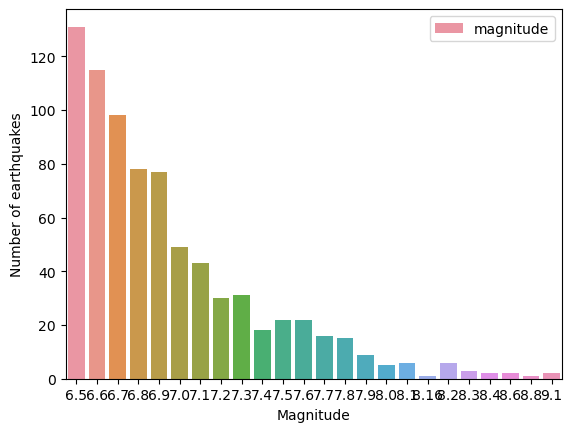

In [12]:
sns.countplot(data= df, x= df['magnitude'],label= 'magnitude')
plt.xlabel("Magnitude")
plt.ylabel("Number of earthquakes")
plt.legend()

plot shows the most occured to least occured magnitude of the earthquake

In [13]:
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.000000,22-11-2022 02:03,8,7,green,1,768,us,117,0.509000,17.000000,mww,14.000000,-9.796300,159.596000,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.900000,18-11-2022 13:37,4,4,green,0,735,us,99,2.229000,34.000000,mww,25.000000,-4.955900,100.738000,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.000000,12-11-2022 07:09,3,3,green,1,755,us,147,3.125000,18.000000,mww,579.000000,-20.050800,-178.346000,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.300000,11-11-2022 10:48,5,5,green,1,833,us,149,1.865000,21.000000,mww,37.000000,-19.291800,-172.129000,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.600000,09-11-2022 10:14,0,2,green,1,670,us,131,4.998000,27.000000,mww,624.464000,-25.594800,178.278000,NaN,NaN,NaN


# Magnitude and Tsunami data

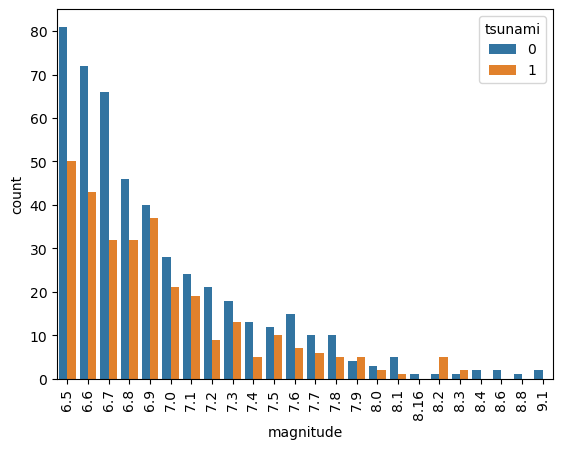

In [14]:
sns.countplot(data= df, x=df['magnitude'], hue=df['tsunami'])
plt.xticks(rotation=90)
plt.show()

plot shows: the magnitude of the earthquake with the possibility of the tsunami

In [15]:
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.000000,22-11-2022 02:03,8,7,green,1,768,us,117,0.509000,17.000000,mww,14.000000,-9.796300,159.596000,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.900000,18-11-2022 13:37,4,4,green,0,735,us,99,2.229000,34.000000,mww,25.000000,-4.955900,100.738000,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.000000,12-11-2022 07:09,3,3,green,1,755,us,147,3.125000,18.000000,mww,579.000000,-20.050800,-178.346000,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.300000,11-11-2022 10:48,5,5,green,1,833,us,149,1.865000,21.000000,mww,37.000000,-19.291800,-172.129000,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.600000,09-11-2022 10:14,0,2,green,1,670,us,131,4.998000,27.000000,mww,624.464000,-25.594800,178.278000,NaN,NaN,NaN


In [16]:
df['continent'].unique()

array(['Oceania', nan, 'North America', 'Asia', 'South America', 'Europe',
       'Africa'], dtype=object)

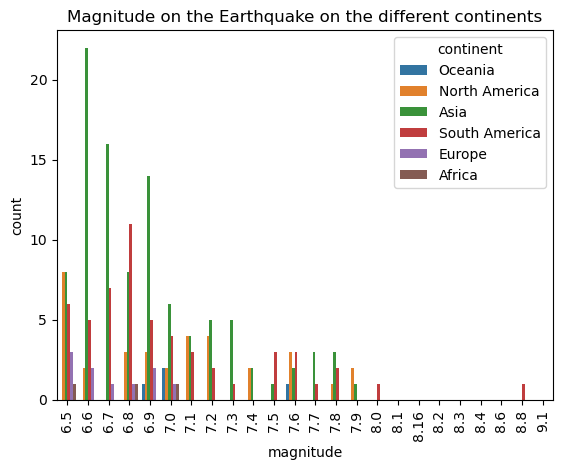

<Figure size 1200x500 with 0 Axes>

In [17]:
sns.countplot(data=df, x= df['magnitude'], hue=df['continent'])
plt.xticks(rotation = 90)
plt.title("Magnitude on the Earthquake on the different continents")
plt.figure(figsize= (12,5))

plt.show()


In [18]:
df.columns.unique()

Index(['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami',
       'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country'],
      dtype='object')

this is giving me all the name of cols of the dataset

<Axes: xlabel='magnitude', ylabel='Density'>

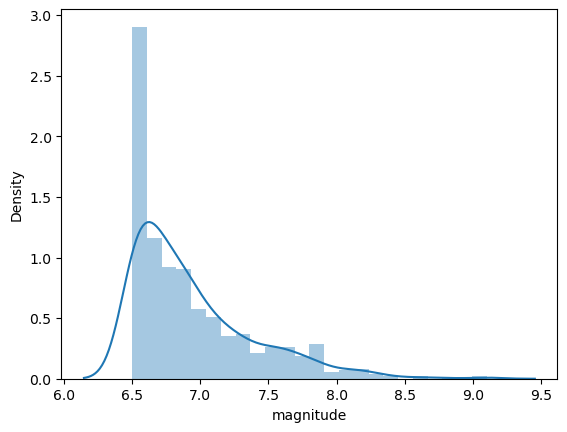

In [19]:
sns.distplot(df['magnitude'])

<Axes: xlabel='magnitude', ylabel='Density'>

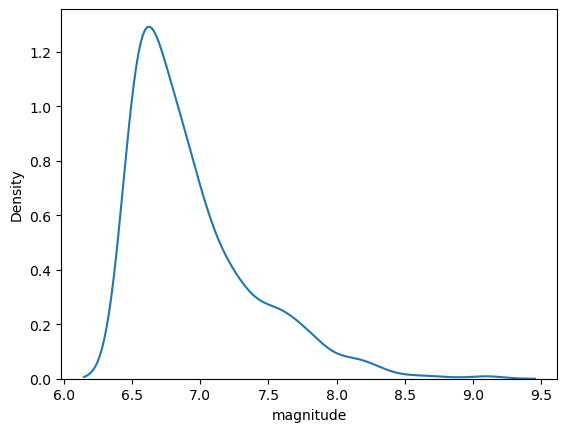

In [20]:
sns.kdeplot(df['magnitude'])

we are able to see the peak in the probabilty density curve in the earthquake magnitude curve is near 6.9. This means the most earthquake occurs within the range 6.5-7.0

In [21]:
df['magnitude'].skew()

1.4444399877408625

This is showinG, how the data is distributed. 
1.44 means data has skewed more to the right. 

In [22]:
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.000000,22-11-2022 02:03,8,7,green,1,768,us,117,0.509000,17.000000,mww,14.000000,-9.796300,159.596000,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.900000,18-11-2022 13:37,4,4,green,0,735,us,99,2.229000,34.000000,mww,25.000000,-4.955900,100.738000,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.000000,12-11-2022 07:09,3,3,green,1,755,us,147,3.125000,18.000000,mww,579.000000,-20.050800,-178.346000,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.300000,11-11-2022 10:48,5,5,green,1,833,us,149,1.865000,21.000000,mww,37.000000,-19.291800,-172.129000,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.600000,09-11-2022 10:14,0,2,green,1,670,us,131,4.998000,27.000000,mww,624.464000,-25.594800,178.278000,NaN,NaN,NaN


In [23]:
df['alert'].unique()

array(['green', 'yellow', 'orange', 'red', nan], dtype=object)

In [24]:
df['alert'].value_counts()

green     325
yellow     56
orange     22
red        12
Name: alert, dtype: int64

<Axes: ylabel='alert'>

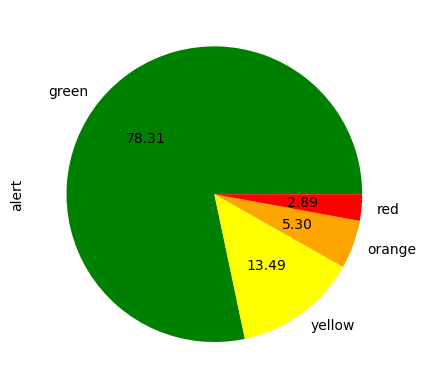

In [25]:
df['alert'].value_counts().plot.pie(autopct='%.2f',colors=['green','yellow','orange','red'])

Red: Severe, high-impact earthquake.
Green: Minor, low-impact earthquake.
Orange: Moderate to significant, some potential for damage.
Yellow: Light to moderate, minimal damage expected.

<Axes: xlabel='magnitude', ylabel='continent'>

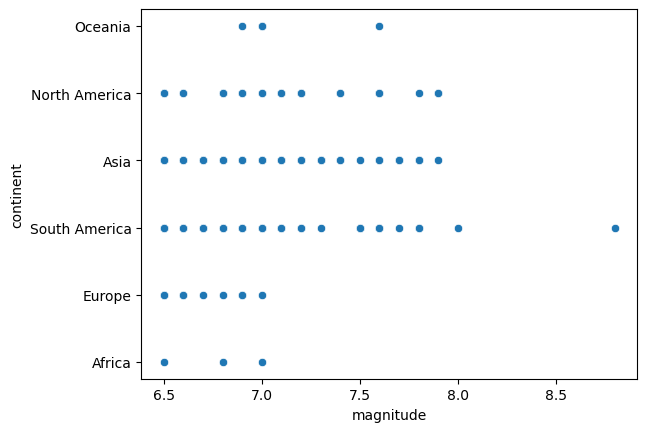

In [26]:
sns.scatterplot(data= df, x='magnitude' ,y='continent' )

magnitude vs continent on a scatter plot

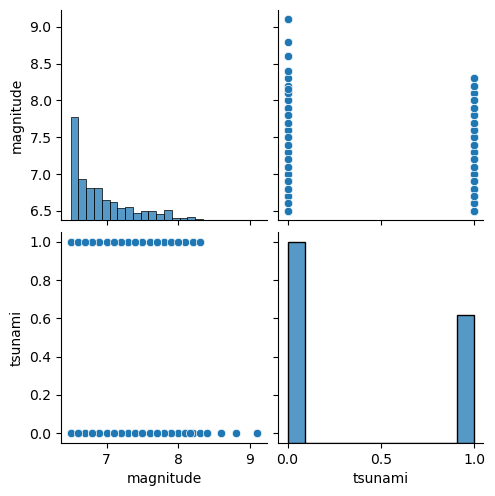

In [27]:
sns.pairplot(data=df[['magnitude','tsunami','alert']])

<Axes: >

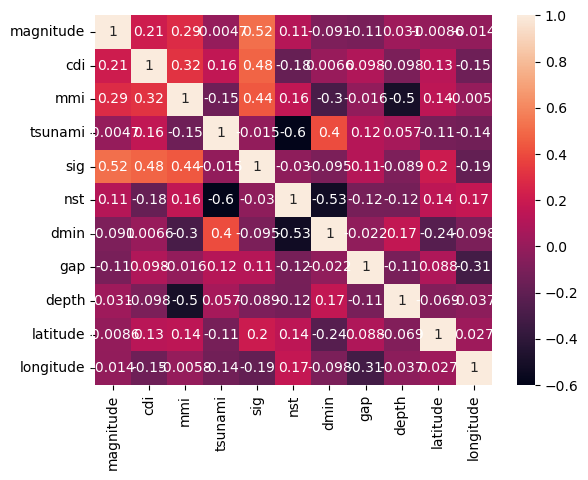

In [28]:
sns.heatmap(data=df.corr(), annot= True)

<Axes: xlabel='magnitude'>

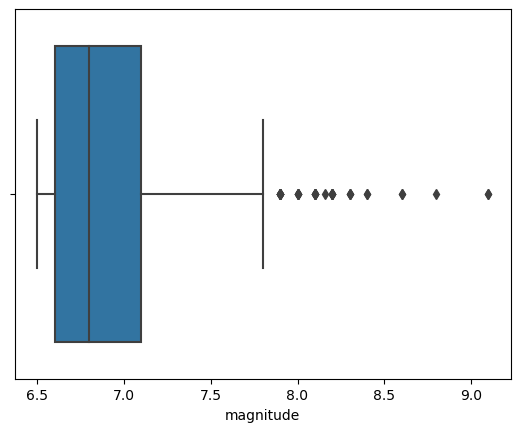

In [29]:
sns.boxplot(data= df, x=df.magnitude)

# EDA-> PART 2

<Axes: xlabel='depth'>

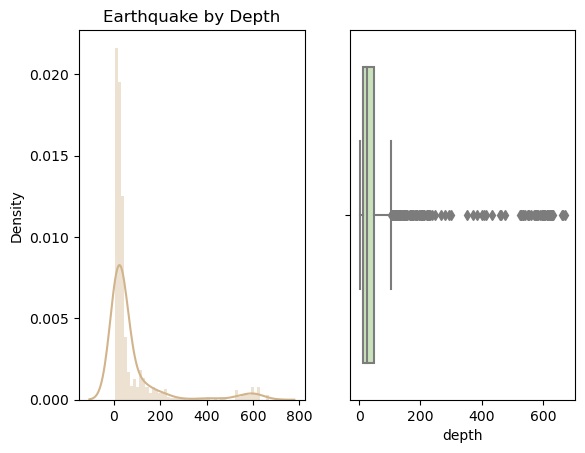

In [30]:
plt.subplot(121)
sns.distplot(x=df['depth'] , color="#D2B48C")
plt.title("Earthquake by Depth")

plt.subplot(122)
sns.boxplot(data=df, x= df['depth'], color="#c7e9b4")

Most of the earthquake occurs at the depth 100m below the earth:
The median depth is approx 30 m

<Axes: xlabel='sig'>

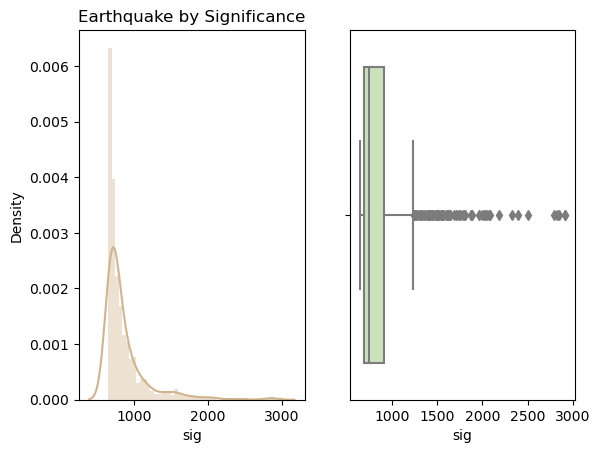

In [31]:
plt.subplot(121)
sns.distplot(df['sig'], color="#D2B48C")
plt.title("Earthquake by Significance")

plt.subplot(122)
sns.boxplot(data=df, x= df['sig'], color="#c7e9b4")

# Relationship b/w
Magnitude vs depth

<Axes: xlabel='magnitude', ylabel='depth'>

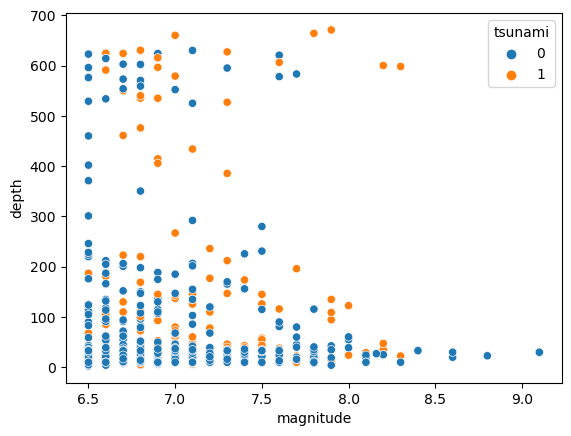

In [32]:
sns.scatterplot(data= df, x= df['magnitude'], y=df['depth'], hue='tsunami', color='#D2B48C')

there we are able to see the relation between the earthquake and depth

<Axes: xlabel='magnitude', ylabel='sig'>

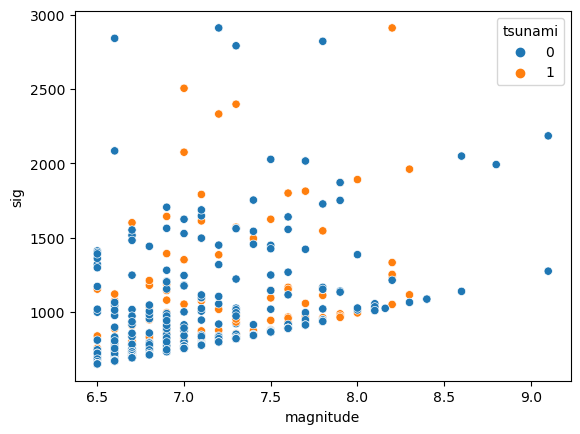

In [33]:
sns.scatterplot(data= df, x='magnitude', y='sig', hue='tsunami')

# Tsunami occurance after the earthquake

<Axes: title={'center': 'Quakes by Tsunami Occurance( in %)'}, ylabel='tsunami'>

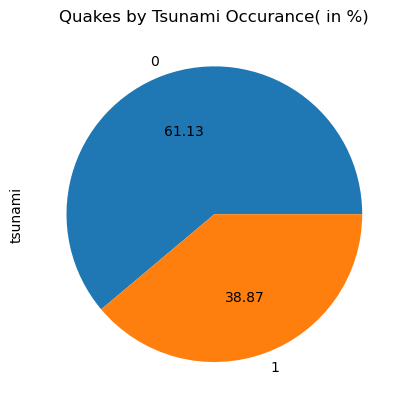

In [34]:
plt.title("Quakes by Tsunami Occurance( in %)")
df['tsunami'].value_counts().plot.pie(autopct='%.2f')

In [35]:
df['tsunami'].value_counts()

0    478
1    304
Name: tsunami, dtype: int64

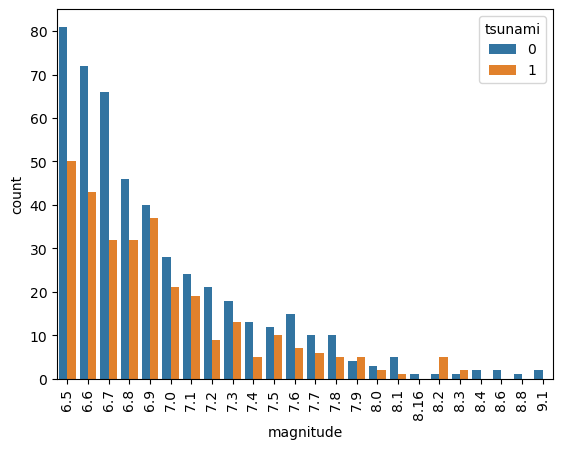

In [36]:
sns.countplot(data=df, x= df['magnitude'], hue= df['tsunami'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='tsunami', ylabel='magnitude'>

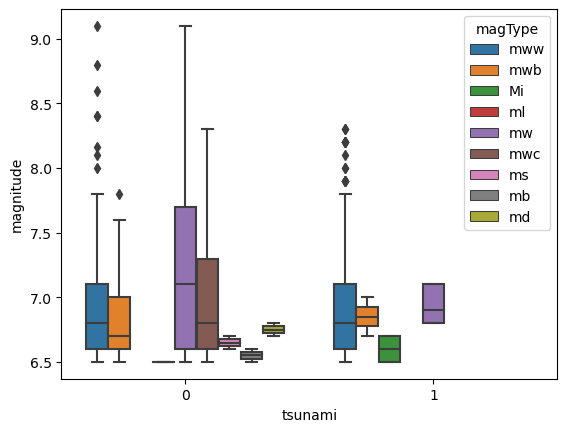

In [37]:
sns.boxplot(data=df, x='tsunami', y='magnitude', hue='magType')

In [38]:
## Analyse the data by Year, Month, Day of the month, and Hour of the day.

## Make a new Date, Year, Month, Day, & Hour columns from the 'date_time' column for our analysis

df['Date'] = pd.to_datetime(df['date_time']).dt.date
df['Year'] = pd.to_datetime(df['date_time']).dt.year
df['Month'] = pd.to_datetime(df['date_time']).dt.month
df['Day'] = pd.to_datetime(df['date_time']).dt.day
df['Hour'] = pd.to_datetime(df['date_time']).dt.hour

## Check the new columns we have created in our dataset

df[['date_time', 'Date', 'Year', 'Month', 'Day', 'Hour']].head(5)

,date_time,Date,Year,Month,Day,Hour
0,22-11-2022 02:03,2022-11-22,2022,11,22,2
1,18-11-2022 13:37,2022-11-18,2022,11,18,13
2,12-11-2022 07:09,2022-12-11,2022,12,11,7
3,11-11-2022 10:48,2022-11-11,2022,11,11,10
4,09-11-2022 10:14,2022-09-11,2022,9,11,10


In [39]:
#analyzing the data by year, month, day of the month and thee hour of the day

#task-> make a new date, year, month, day and hour columns from the date_time col analysis

df.shape
note: there were 19 cols, before now it is 24-> 5 of the new one added from the date_time object. 

#what this piece of code is doing-> taking datetime object from the df and converting it to the date time, dt.date-> means extracting just the date feature among all. 

In [40]:
df.sample(3)

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,...,latitude,longitude,location,continent,country,Date,Year,Month,Day,Hour
9,"M 7.6 - 35 km SSW of Aguililla, Mexico",7.600000,19-09-2022 18:05,9,8,yellow,1,1799,us,271,...,18.366700,-103.252000,"Aguililla, Mexico",North America,Mexico,2022-09-19,2022,9,19,18
329,M 6.9 - Federated States of Micronesia region,6.900000,03-08-2014 00:22,0,4,green,1,732,us,0,...,0.829500,146.169000,Micronesia region,NaN,NaN,2014-03-08,2014,3,8,0
282,"M 6.7 - 61 km WNW of Illapel, Chile",6.700000,17-09-2015 04:10,5,7,green,0,718,us,0,...,-31.517300,-71.804000,"Illapel, Chile",NaN,Chile,2015-09-17,2015,9,17,4


# visualization of the plots according to the cols extracted from the date_time object. 

Text(0, 0.5, '')

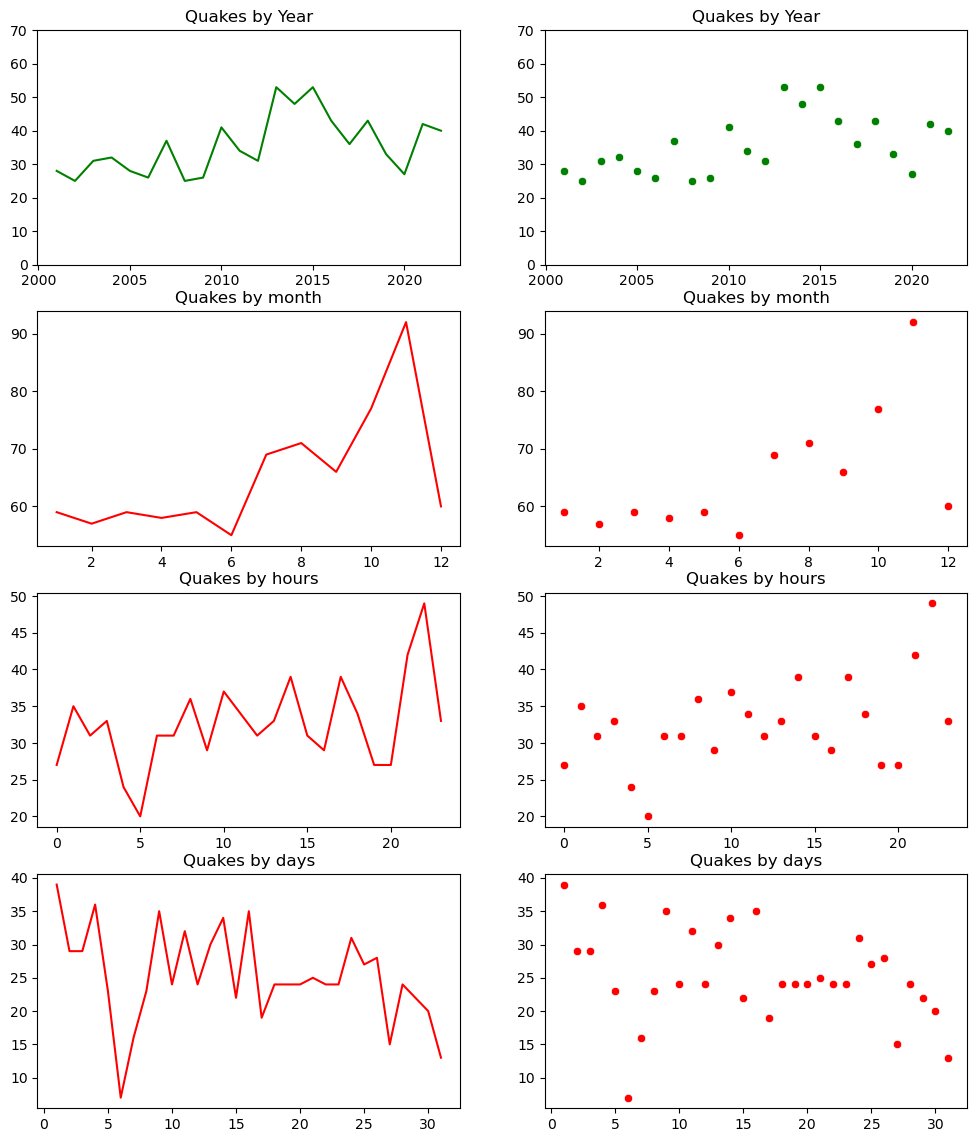

In [41]:
#adjusting size
plt.subplots(figsize=(12,14))

#plot by year
plt.subplot(421)
plt.title("Quakes by Year")
sns.lineplot(data= df['Year'].value_counts().sort_values(),color='g')
plt.ylim(0,70)
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(422)
plt.title("Quakes by Year")
sns.scatterplot(data= df['Year'].value_counts().sort_values(),color='g')
plt.ylim(0,70)
plt.xlabel(None)
plt.ylabel(None)


#by month
plt.subplot(423)
sns.lineplot(data=df['Month'].value_counts().sort_values(), color='r')
plt.title("Quakes by month")
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(424)
sns.scatterplot(data=df['Month'].value_counts().sort_values(), color='r')
plt.title("Quakes by month")


plt.ylabel(None)


#by hours
plt.subplot(425)
sns.lineplot(data=df['Hour'].value_counts().sort_values(), color='r')
plt.title("Quakes by hours")
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(426)
sns.scatterplot(data=df['Hour'].value_counts().sort_values(), color='r')
plt.title("Quakes by hours")
plt.xlabel(None)
plt.ylabel(None)


#by day
plt.subplot(427)
sns.lineplot(data=df['Day'].value_counts().sort_values(), color='r')
plt.title("Quakes by days")
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(428)
sns.scatterplot(data=df['Day'].value_counts().sort_values(), color='r')
plt.title("Quakes by days")
plt.xlabel(None)
plt.ylabel(None)



 a bit of information is being extracted from the years, hours and months column of the datetime. 

INFERENCE: 
1) The quakes occur fairly more in the year 2013, 2014, and 2015.
2) the 11th month of the year i.e. November seems to have more number of earthquakes compare to others.
3) By hours, the lowest earthquakes between 4 a.m. and 5 a.m. (early morning), whereas it is highest between 9 p.m. and 10 p.m. (night time)

# MISSING VALUES:

In [42]:
df.sample(3)


,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,...,latitude,longitude,location,continent,country,Date,Year,Month,Day,Hour
357,"M 6.7 - 63 km WNW of Iquique, Chile",6.700000,16-03-2014 21:16,7,7,green,1,718,us,0,...,-19.980700,-70.702200,"Iquique, Chile",NaN,NaN,2014-03-16,2014,3,16,21
568,"M 6.6 - 161 km SSW of Padang, Indonesia",6.600000,25-02-2008 18:06,4,6,NaN,0,674,us,421,...,-2.332000,99.891000,"Padang, Indonesia",NaN,Indonesia,2008-02-25,2008,2,25,18
504,"M 6.9 - 233 km NNW of Qamdo, China",6.900000,13-04-2010 23:49,6,9,NaN,0,773,us,410,...,33.165000,96.548000,"Qamdo, China",Asia,People's Republic of China,2010-04-13,2010,4,13,23


1) Of the 782 records in the dataset, country names were missing for 298 records, whereas location information was missing for 5 records. So we decieded to fill the country names from location, which has country name in it.
2) First, we created a new dataframe with the location information in the earthquake dataset. We made it in a two column format by moving the last word of the location information in to the second (last) column (which infact is the country name).
3) Later we filled the missing country names with the data (i.e., country name) we have in the second column of the new dataframe.
4) We further processed the location column, to fill all the country names.
5) BOOOM!!! Now all the missing data is filled with pertaining country names. Our missing data problem solved.
6) However, the country names column requires some optimisation which we do in our later steps at the time of visualising the data.

In [43]:
print("the number of misising values in location: ", df['location'].isnull().sum())
#lcoation has 5 missing data

print("the number of misising values in location: ", df['country'].isnull().sum())

the number of misising values in location:  5
the number of misising values in location:  298


# How we added missing country names from the available location information:

Step 1) Of the 782 records in the dataset, country names were missing for 298 records, whereas location information was missing for 5 records. So we decieded to fill the country names from location, which has country name in it.
First, we created a new dataframe with the location information in the earthquake dataset. We made it in a two column format by moving the last word of the location information in to the second (last) column (which infact is the country name).

# creating new dataframe using the location information in the earthquake dataset. 

In [44]:
df_r= df['location'].str.split(pat=', ', n=1, expand= True)
df_r.head(5)

,0,1
0,Malango,Solomon Islands
1,Bengkulu,Indonesia
2,NaN,NaN
3,Neiafu,Tonga
4,NaN,NaN


df_r= df['location'].str.split(pat=', ', n=1, expand= True)
Explanation->
str.split()--> is splitting the string present in the location cols
pat=' , '--> this means the pattern by which it is separated- is due to 1 comma, whenever it sees one comma it tries to split the string based on that
Expand= True--> this mean the new datset is created, if FALSE, this would then be the series of the list. 

In [45]:
df['country'].head(4)

0    Solomon Islands
1                NaN
2               Fiji
3                NaN
Name: country, dtype: object

In [46]:
df_r

,0,1
0,Malango,Solomon Islands
1,Bengkulu,Indonesia
2,NaN,NaN
3,Neiafu,Tonga
4,NaN,NaN
...,...,...
777,Puerto El Triunfo,El Salvador
778,Old Harbor,Alaska
779,Port-Olry,Vanuatu
780,Mindanao,Philippines


In [47]:
#filling the missing country data, with country names in country column of df_r (df_r[1]) is the country col here.


In [48]:
df['country']= df['country'].fillna(df_r[1])
print("missing values in the refined countries are: ", df['country'].isna().sum())

missing values in the refined countries are:  45


In [49]:
#making the fresh dataframe by dropping the null values from the country, location, continent, and cols 
df_country= df.dropna(subset= ['country','location','continent'], how='all')
print("missing values in the country column are: ", df_country['country'].isnull().sum())

missing values in the country column are:  42


In [50]:
print("missing location values before: ", df_country['location'].isnull().sum())

df_country['location']= df_country['location'].fillna('unknown')

print("missing location alues after", df_country['location'].isnull().sum())

missing location values before:  2
missing location alues after 0


In [51]:
##we try to fll location names as missing country names, and refine it lateer
df_country['country']= df_country['country'].fillna(df_country['location'])

#checking the null values in country column

df_country['country'].isnull().sum()

0

In [52]:
df_country['country'].unique()

array(['Solomon Islands', 'Indonesia', 'Fiji', 'Tonga',
       'the Fiji Islands', 'Panama', 'Mexico', 'Taiwan', 'Vanuatu',
       'Papua New Guinea', "People's Republic of China",
       'the Kermadec Islands', 'Philippines', 'Brazil', 'Peru',
       'Argentina', 'Nicaragua', 'the Loyalty Islands', 'New Caledonia',
       'Japan', 'New Zealand', 'Kermadec Islands region', 'Alaska',
       'Cyprus', 'United States of America', 'Vanuatu region',
       'Antarctica', 'South Sandwich Islands region', 'Haiti',
       'Wallis and Futuna', 'Mauritius - Reunion region', 'Russia',
       'Mongolia', 'Chile', 'Greece', 'central Mid-Atlantic Ridge',
       'Jamaica', 'Turkey',
       'United Kingdom of Great Britain and Northern Ireland (the)',
       'Australia', 'El Salvador', 'South Sandwich Islands', 'Ecuador',
       'Prince Edward Islands region',
       'South Georgia and the South Sandwich Islands',
       'Svalbard and Jan Mayen', 'Canada', 'Venezuela', 'Bolivia',
       'Honduras', 'Bo